In [1]:
import os
import sys
import keras
import numpy as np
import tensorflow as tf
from keras import datasets
import matplotlib
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

import bfcnn

# List available models

In [2]:
print(list(bfcnn.pretrained_models.keys()))

['sparse_resnet_5x5_bn_3x3']


# Create noise patch

In [3]:
RANDOM_BATCH_SIZE = (4, 256, 256, 1)

x = \
    tf.random.truncated_normal(
        seed=0,
        mean=128,
        stddev=10,
        shape=RANDOM_BATCH_SIZE)

x = \
    tf.clip_by_value(
        x, 
        clip_value_min=0, 
        clip_value_max=255)
x = x.numpy()

# Plot patch

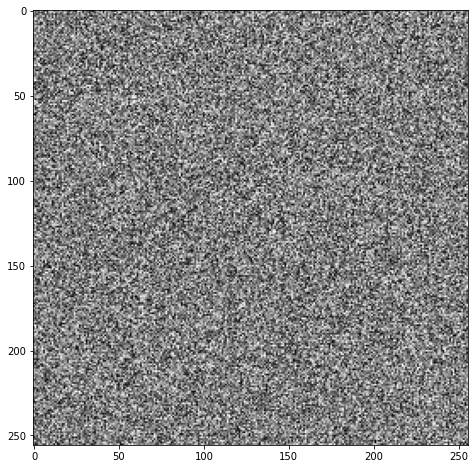

In [4]:
fig = plt.figure(figsize=(8,8))
plt.imshow(x[0,:,:,0], cmap="gray_r") 

# Load model

In [5]:
model = bfcnn.load_model("sparse_resnet_5x5_bn_3x3")
x_denoise = x
for i in range(3):
    x_denoise = model(x_denoise)

# Plot noisy patch

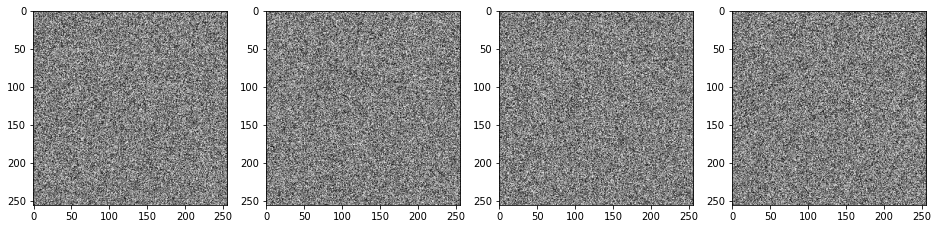

In [6]:
fig = plt.figure(figsize=(16,8))
for i in range(RANDOM_BATCH_SIZE[0]):
    plt.subplot(1, RANDOM_BATCH_SIZE[0], i+1)
    plt.imshow(x[i,:,:,0], cmap="gray_r") 
plt.show()

# Plot denoised patch

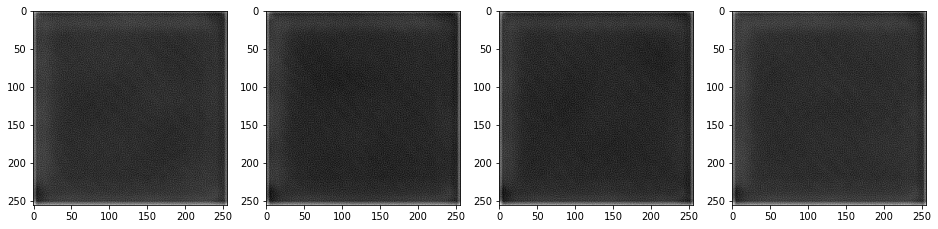

In [7]:
fig = plt.figure(figsize=(16,8))
for i in range(RANDOM_BATCH_SIZE[0]):
    plt.subplot(1, RANDOM_BATCH_SIZE[0], i+1)
    plt.imshow(x_denoise[i,:,:,0], cmap="gray_r") 
plt.show()